In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import pandas as pd
file = Path('Resources/crypto_data.csv')

In [36]:
crypto_df = pd.read_csv(file)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [37]:
# Filter for currencies that are currently being traded.
traded_crypto = crypto_df[crypto_df["IsTrading"] == True]
traded_crypto = traded_crypto.rename(columns = {"Unnamed: 0":"Symbol"})
traded_crypto

,Symbol,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [38]:
# Remove the IsTrading Column
traded_df = traded_crypto.drop(columns=["IsTrading"])
traded_df

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [39]:
# Remove all rows that have at least one null value.
for column in traded_df.columns:
    print(f"Column {column} has {traded_df[column].isnull().sum()} null values")

Column Symbol has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [40]:
no_null_df = traded_df.dropna()
no_null_df

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [41]:
# Filter for cryptocurrencies that have been mined.
mined_df = no_null_df[no_null_df["TotalCoinsMined"] > 0]
mined_df

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [46]:
clean = mined_df.drop(columns=["CoinName"])
clean_df = clean.set_index("Symbol")
clean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Symbol,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [54]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data.
dummies_df = pd.get_dummies(clean_df, columns=["Algorithm", "ProofType"])
dummies_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Symbol,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
crypto_scaled = StandardScaler().fit_transform(dummies_df)

In [64]:
# Perform dimensionality reduction with PCA.
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         7.87306563e-16, -1.84616729e-18, -4.15361072e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.17409449e-15,  5.25116470e-16, -3.80497340e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.75207903e-14, -2.36464424e-14,  2.84400186e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.93578889e-14, -8.67896697e-15, -3.66917605e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.78255127e-15, -2.03579310e-16, -4.38160754e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -4.70588149e-16, -9.07306180e-17, -2.78763670e-15]])

In [63]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features

array([[ 15.498084  ,  -4.5994673 ],
       [ 19.96905   ,  -0.02525955],
       [ 22.970133  , -12.988719  ],
       ...,
       [-19.675802  ,  12.353634  ],
       [-19.426268  ,  -0.6091004 ],
       [ -1.7767035 ,  -9.819806  ]], dtype=float32)

In [70]:
x = tsne_features[:,0]
y = tsne_features[:,1]

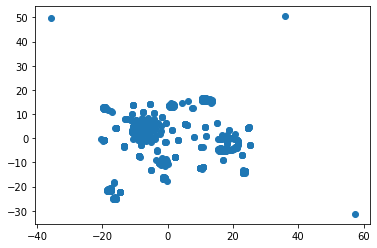

In [71]:
plt.scatter(x, y)
plt.show()

In [74]:
# Cluster Analysis with k-Means.
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dummies_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23


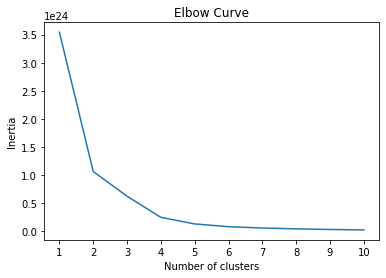

In [75]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

According to the elbow curve cryptocurrencies can be clustered together in four groups.